<a href="https://colab.research.google.com/github/daniarherikurniawan/Sci-Learn/blob/master/LSTM%E5%85%B1%E6%9C%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip /content/drive/My\ Drive/csvall/csv.zip 

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: csv/3100661033.avi.csv  
  inflating: csv/3100661036.avi.csv  
  inflating: csv/3100661037.avi.csv  
  inflating: csv/3100661038.avi.csv  
  inflating: csv/3100661040.avi.csv  
  inflating: csv/3100661043.avi.csv  
  inflating: csv/3100661044.avi.csv  
  inflating: csv/3100661046.avi.csv  
  inflating: csv/3100661049.avi.csv  
  inflating: csv/3100661050.avi.csv  
  inflating: csv/3100662014.avi.csv  
  inflating: csv/3100662015.avi.csv  
  inflating: csv/3100662016.avi.csv  
  inflating: csv/3100662017.avi.csv  
  inflating: csv/3100662020.avi.csv  
  inflating: csv/3100662022.avi.csv  
  inflating: csv/3100662023.avi.csv  
  inflating: csv/3100662026.avi.csv  
  inflating: csv/3100662029.avi.csv  
  inflating: csv/3100662032.avi.csv  
  inflating: csv/3100662035.avi.csv  
  inflating: csv/3100662036.avi.csv  
  inflating: csv/3100662037.avi.csv  
  inflating: csv/3100662045.avi.csv  
  inflating: csv/3100662046.avi.csv  
  inflating: csv/3

In [0]:
import csv
import numpy as np
import os
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#csv文件目录
csv_path = "/content/csv/"

#读取labels文件，放在/content/目录下   labelsを読み、contentにおいて
def trainLabels(file):
  with open(file, newline='') as csvFile:
    lines = csv.reader(csvFile, delimiter=',')
    data = []
    for line in lines:
      data.append(line)
    data = data[1:]
    return data
#根据文件名找到结果　　　ファイルの名前でエンゲージメンの結果を探す
def searchTargetByFile(labels, file):
    for i in labels:
        for j in i:
            if j == file:
                return i
    return -1 
#所有帧数据变为一条特征　　一行の特徴量にまとめ
def trainData(file):
  with open(file, newline='') as csvFile:
    lines = csv.reader((i.replace('\x00', '') for i in csvFile), csvFile, delimiter=',', quoting = csv.QUOTE_NONNUMERIC )
    data = []
    for line in lines:
      tmp = []
      for i in range(len(line)):
       if ((i + 1)%3) != 0:
        tmp.append(line[i])
      data.append(tmp)
    data = data[1:]
    return data
#将特征和结果做成数据　　　　特徴量とエンゲージメンを一行にまとめ
def prepareData():
  labels = trainLabels('AllLabels.csv')
  #data_train = []
  #print(labels)
  csvFile = open('prepareData.csv','a') 
  #逐个处理csv文件
  for file in os.listdir(csv_path):
    if '.csv' in file:
      data_tmp = trainData(csv_path + file)
      #print(data_tmp)
      if 300 > len(data_tmp):
        print("this file is less than 300 frames: " + file)
        continue 
      elif 300 < len(data_tmp):
        data_tmp = data_tmp[:299]
      #data_tmp = np.array(data_tmp).flatten()

      target_train = searchTargetByFile(labels, file[0:-4])
      #print("fileName: " + file)
      if target_train == -1:
        print("can't find this file label - fileName: " + file)
      else:
        #print(target_train[1:5])
        #结合特征和结果，作为一条训练数据
        data_tmp = (np.append(data_tmp, target_train[2])).flatten()
        #data_tmp.append(target_train[2])
        #data_tmp = list(map(float,data_tmp))
        np.savetxt(csvFile, data_tmp.reshape(1,len(data_tmp)), fmt = '%s', delimiter = ',')
        csvFile.write("\n");
        #data_train.append(data_tmp)
  csvFile.close()
  #return data_train

if __name__ == '__main__':
  #删除上次的文件
  if os.path.exists('prepareData.csv'):
    os.remove('prepareData.csv')
  data_train = prepareData()
  #csvfile = open('prepareData.csv', 'w', newline='') # python3下
  #writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_ALL)
  #for i in data_train:
  #  writer.writerow(i)
  #csvfile.close()  
 
  #tmp = np.array(data_train)
  #np.savetxt('prepareData.csv', tmp, delimiter = ',', fmt = '%s')
  print("Data prepare complete! check file prepareData.csv!")

can't find this file label - fileName: 9988260143.avi.csv
this file is less than 300 frames: 9877360169.avi.csv
this file is less than 300 frames: 9877360181.avi.csv
can't find this file label - fileName: 998826021.avi.csv
can't find this file label - fileName: 9988260132.avi.csv
can't find this file label - fileName: 9988260235.avi.csv
can't find this file label - fileName: 9988260273.avi.csv
can't find this file label - fileName: 9988260250.avi.csv
this file is less than 300 frames: 9877360182.avi.csv
can't find this file label - fileName: 9988260247.avi.csv
this file is less than 300 frames: 9877360256.avi.csv
this file is less than 300 frames: 9877360258.avi.csv
can't find this file label - fileName: 9988260217.avi.csv
this file is less than 300 frames: 9289010273.avi.csv
this file is less than 300 frames: 5221290257.avi.csv
this file is less than 300 frames: 9877360185.avi.csv
can't find this file label - fileName: 998826022.avi.csv
this file is less than 300 frames: 9877360270.av

In [0]:
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
def series_to_supervised(data, n_in=0, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
dataset = read_csv('prepareData.csv', header=None, index_col=None) #, delimiter="\t"
values = dataset.values
print (dataset.head())

     0        1      2      3      ...    45597    45598    45599  45600
0  171.494  415.565    0.0    0.0  ...  259.583  349.187  265.416      2
1  187.147  450.790    0.0    0.0  ...  270.541  358.998  275.074      2
2  171.463  390.717    0.0    0.0  ...  273.841  329.677  268.683      2
3  180.611  398.593    0.0    0.0  ...  263.201  343.058  256.759      3
4  151.902  402.486    0.0    0.0  ...  251.551  367.314  241.296      2

[5 rows x 45601 columns]


In [0]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas import DataFrame
#values = dataset.values
values = values.astype('float32')
print(values.shape)
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)
print(scaled)
reframed = series_to_supervised(scaled)
print(reframed.shape)
print(reframed.head())

(7705, 45601)
[[0.26630333 0.87132424 0.         ... 0.55253226 0.6306665  0.6666667 ]
 [0.29061    0.9451813  0.         ... 0.568031   0.65361536 0.6666667 ]
 [0.2662552  0.8192249  0.         ... 0.52171147 0.6384294  0.6666667 ]
 ...
 [0.34738195 0.70982426 0.         ... 0.5835504  0.4530593  0.6666667 ]
 [0.25617102 0.9506369  0.         ... 0.6193237  0.54816204 0.6666667 ]
 [0.3007221  0.6687872  0.         ... 0.6298068  0.4072235  0.6666667 ]]
(7705, 45601)
    var1(t)   var2(t)  var3(t)  ...  var45599(t)  var45600(t)  var45601(t)
0  0.266303  0.871324      0.0  ...     0.552532     0.630666     0.666667
1  0.290610  0.945181      0.0  ...     0.568031     0.653615     0.666667
2  0.266255  0.819225      0.0  ...     0.521711     0.638429     0.666667
3  0.280461  0.835739      0.0  ...     0.542850     0.610096     1.000000
4  0.235880  0.843901      0.0  ...     0.581168     0.573354     0.666667

[5 rows x 45601 columns]


In [0]:
# split into train and test sets
values = reframed.values
train_length = int(len(values) * 0.7)  0.8
train = values[:train_length, :]
test = values[train_length:, :]

# split into input and outputs
train_x, train_y = train[:,:-1], train[:,-1]
test_x, test_y = test[:, :-1], test[:,-1]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0],300,152))
test_x = test_x.reshape((test_x.shape[0], 300, 152))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


(5393, 300, 152) (5393,) (2312, 300, 152) (2312,)


Train on 5393 samples, validate on 2312 samples
Epoch 1/20
5393/5393 [==============================] - 134s 25ms/step - loss: 0.2932 - val_loss: 0.1729
Epoch 2/20
5393/5393 [==============================] - 132s 25ms/step - loss: 0.1695 - val_loss: 0.1700
Epoch 3/20
5393/5393 [==============================] - 133s 25ms/step - loss: 0.1792 - val_loss: 0.1852
Epoch 4/20
5393/5393 [==============================] - 133s 25ms/step - loss: 0.1771 - val_loss: 0.1810
Epoch 5/20
5393/5393 [==============================] - 134s 25ms/step - loss: 0.1801 - val_loss: 0.1788
Epoch 6/20
5393/5393 [==============================] - 133s 25ms/step - loss: 0.1686 - val_loss: 0.1669
Epoch 7/20
5393/5393 [==============================] - 133s 25ms/step - loss: 0.1664 - val_loss: 0.1697
Epoch 8/20
5393/5393 [==============================] - 134s 25ms/step - loss: 0.1745 - val_loss: 0.2008
Epoch 9/20
5393/5393 [==============================] - 136s 25ms/step - loss: 0.1780 - val_loss: 0.1833
Epoch 1

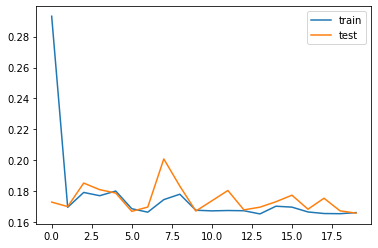

accuracy


In [0]:
#ネットワークを参考する

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from matplotlib import pyplot

#model = Sequential()
#model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2])))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')


n_steps = 300
n_features = train_x.shape[2]

model = Sequential()
model.add(LSTM(256, input_shape=(n_steps, n_features)))  relu 
#model.add(Dropout(0.2))
model.add(Dense(1))   softmax

model.compile(loss='mae', optimizer='adam')
history = model.fit(train_x, train_y, epochs=20, batch_size=150, validation_data=(test_x, test_y), verbose=1, shuffle=False)


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
#五层网络

import pandas as pd
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from matplotlib import pyplot

n_steps = 300
n_features = train_x.shape[2]

model = Sequential()
model.add(LSTM(64, input_shape=(n_steps, n_features))) 
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(512)) 
#model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
history = model.fit(train_x, train_y, epochs=20, batch_size=50, validation_data=(test_x, test_y), verbose=2, shuffle=False)


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

# make a prediction
#print(test_x.shape)
#if test_x.shape[1] != 1:
  #test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], (test_x.shape[2]*300)))
    # invert scaling for forecast
#inv_yhat = concatenate((yhat, test_x[:, 0:]), axis=1)
##inv_yhat = concatenate((yhat, test_x), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]
##inv_yhat = np.array(inv_yhat)
#    # invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = concatenate((test_y, test_x[:, 0:]), axis=1)
##inv_y = concatenate((test_y, test_x), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# invert scaling for forecast
inv_yhat = concatenate((test_x, yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_x, test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

    # calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.235
